# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
#Step 1: Setup and installation Step 1: Setup and installation = ok
#Step 2: Create app.py =ok
#Step 3: Download the data using request library   https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue =OK
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

pag = requests.get(url)



In [2]:
print(pag)
# si es 200 OK

<Response [200]>


In [3]:
pag_texto = pag.text

In [4]:
#Step 4: Parse the html data using beautiful_soup
#1.find all tables
#2.find table with Tesla quarterly revenue
#3.create the dataframe
#4.Iterate over the table rows to get the values and remove the $ and comma
from bs4 import BeautifulSoup

In [5]:
text_beaut = BeautifulSoup(pag_texto, "html.parser")

In [6]:
type(text_beaut)

bs4.BeautifulSoup

In [7]:
#1.find all tables
tablas = text_beaut.findAll("table")
print(len(tablas))

6


In [8]:
#2.find table with Tesla quarterly revenue
id_tabla_quarter = None

for i in range(len(tablas)):
    if "Tesla Quarterly Revenue" in str(tablas[i]):
        id_tabla_quarter = i
        print("Tabla encontrada:", id_tabla_quarter)
        break




Tabla encontrada: 1


In [9]:
tabla_quarter = tablas[1]

In [10]:
tabla_quarter_body = tabla_quarter.tbody
tabla_quarter_body

<tbody>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>
</tr>
<tr>
<td style="text-align:center">2020-03-31</td>
<td style="text-align:center">$5,985</td>
</tr>
<tr>
<td style="text-align:center">2019-12-31</td>
<td style="text-align:center">$7,384</td>
</

In [11]:
lista_tr = tabla_quarter_body.find_all("tr")

lista_tr

[<tr>
 <td style="text-align:center">2022-03-31</td>
 <td style="text-align:center">$18,756</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-12-31</td>
 <td style="text-align:center">$17,719</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-09-30</td>
 <td style="text-align:center">$13,757</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-06-30</td>
 <td style="text-align:center">$11,958</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-03-31</td>
 <td style="text-align:center">$10,389</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-12-31</td>
 <td style="text-align:center">$10,744</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-09-30</td>
 <td style="text-align:center">$8,771</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-06-30</td>
 <td style="text-align:center">$6,036</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-03-31</td>
 <td style="text-align:center">$5,985</td>
 </tr>,
 <tr>
 <td style="text-align:center">2019-12-31</td>
 <td 

In [12]:
revenue_ls = []

import tqdm

for tr in tqdm.tqdm(lista_tr):
    all_tr = tr.find_all("td")
    date = all_tr[0].text
    revenue = all_tr[1].text 
    #print("*"*10)
    #print(len(date), date)
    #print(date[0].text, date[1].text)
    revenue_ls.append([date,revenue])

print(revenue_ls)

100%|██████████| 52/52 [00:00<00:00, 53839.50it/s]

[['2022-03-31', '$18,756'], ['2021-12-31', '$17,719'], ['2021-09-30', '$13,757'], ['2021-06-30', '$11,958'], ['2021-03-31', '$10,389'], ['2020-12-31', '$10,744'], ['2020-09-30', '$8,771'], ['2020-06-30', '$6,036'], ['2020-03-31', '$5,985'], ['2019-12-31', '$7,384'], ['2019-09-30', '$6,303'], ['2019-06-30', '$6,350'], ['2019-03-31', '$4,541'], ['2018-12-31', '$7,226'], ['2018-09-30', '$6,824'], ['2018-06-30', '$4,002'], ['2018-03-31', '$3,409'], ['2017-12-31', '$3,288'], ['2017-09-30', '$2,985'], ['2017-06-30', '$2,790'], ['2017-03-31', '$2,696'], ['2016-12-31', '$2,285'], ['2016-09-30', '$2,298'], ['2016-06-30', '$1,270'], ['2016-03-31', '$1,147'], ['2015-12-31', '$1,214'], ['2015-09-30', '$937'], ['2015-06-30', '$955'], ['2015-03-31', '$940'], ['2014-12-31', '$957'], ['2014-09-30', '$852'], ['2014-06-30', '$769'], ['2014-03-31', '$621'], ['2013-12-31', '$615'], ['2013-09-30', '$431'], ['2013-06-30', '$405'], ['2013-03-31', '$562'], ['2012-12-31', '$306'], ['2012-09-30', '$50'], ['2012

In [13]:

#3.create the dataframe
import pandas as pd

revenue_df = pd.DataFrame(revenue_ls, columns=["Date", "Revenue"])

revenue_df.head()

,Date,Revenue
0,2022-03-31,"$18,756"
1,2021-12-31,"$17,719"
2,2021-09-30,"$13,757"
3,2021-06-30,"$11,958"
4,2021-03-31,"$10,389"


In [14]:
#4.Iterate over the table rows to get the values and remove the $ and comma
import numpy as np

def preproc_revenue(texto):
    texto = texto.replace("$","")
    texto = texto.replace(",","")
    if texto == "":
        return np.nan
    return float(texto)


In [15]:
preproc_revenue(revenue_df["Revenue"][1])

17719.0

In [16]:
revenue_df["Revenue"]=revenue_df["Revenue"].apply(preproc_revenue)

In [17]:
revenue_df

,Date,Revenue
0,2022-03-31,18756.0
1,2021-12-31,17719.0
2,2021-09-30,13757.0
3,2021-06-30,11958.0
4,2021-03-31,10389.0
5,2020-12-31,10744.0
6,2020-09-30,8771.0
7,2020-06-30,6036.0
8,2020-03-31,5985.0
9,2019-12-31,7384.0


In [18]:

#Step 5: Clean rows Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column and print
revenue_df = revenue_df.dropna(subset="Revenue")
revenue_df

,Date,Revenue
0,2022-03-31,18756.0
1,2021-12-31,17719.0
2,2021-09-30,13757.0
3,2021-06-30,11958.0
4,2021-03-31,10389.0
5,2020-12-31,10744.0
6,2020-09-30,8771.0
7,2020-06-30,6036.0
8,2020-03-31,5985.0
9,2019-12-31,7384.0


In [19]:
revenue_df.to_csv("revenue_df.csv", index=None)

## Generar tabla SQL

In [20]:
#Step 6: Insert the data into sqlite3
import sqlite3

In [29]:
#Step 7: Connect to SQLite
connection = sqlite3.Connection("Tesla.db")

c = connection.cursor()
#Step 8: Let's create a table in our database to store our revenue values:
# Create table
c.execute('''CREATE TABLE revenue3
(Date, Revenue)''')

records = revenue_df.to_records(index=False)
list_of_tuples = list(records)



In [30]:
# Insert the values
c.executemany('INSERT INTO revenue3 VALUES (?,?)', list_of_tuples)
# Save (commit) the changes
connection.commit()
# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
connection.close()

In [46]:
#Step 9: Now retrieve the data from the database
#Our database name is “Tesla.db”. We saved the connection to the connection object.

connection = sqlite3.Connection("Tesla.db")
c = connection.cursor()

#Next time we run this file, it just connects to the database, and if the database is not there, it will create one.
#https://docs.python.org/3/library/sqlite3.html
for row in c.execute('SELECT * FROM revenue3 ORDER BY date'):
        print(row)


('2009-06-30', 27.0)
('2009-09-30', 46.0)
('2010-03-31', 21.0)
('2010-06-30', 28.0)
('2010-09-30', 31.0)
('2010-12-31', 36.0)
('2011-03-31', 49.0)
('2011-06-30', 58.0)
('2011-09-30', 58.0)
('2011-12-31', 39.0)
('2012-03-31', 30.0)
('2012-06-30', 27.0)
('2012-09-30', 50.0)
('2012-12-31', 306.0)
('2013-03-31', 562.0)
('2013-06-30', 405.0)
('2013-09-30', 431.0)
('2013-12-31', 615.0)
('2014-03-31', 621.0)
('2014-06-30', 769.0)
('2014-09-30', 852.0)
('2014-12-31', 957.0)
('2015-03-31', 940.0)
('2015-06-30', 955.0)
('2015-09-30', 937.0)
('2015-12-31', 1214.0)
('2016-03-31', 1147.0)
('2016-06-30', 1270.0)
('2016-09-30', 2298.0)
('2016-12-31', 2285.0)
('2017-03-31', 2696.0)
('2017-06-30', 2790.0)
('2017-09-30', 2985.0)
('2017-12-31', 3288.0)
('2018-03-31', 3409.0)
('2018-06-30', 4002.0)
('2018-09-30', 6824.0)
('2018-12-31', 7226.0)
('2019-03-31', 4541.0)
('2019-06-30', 6350.0)
('2019-09-30', 6303.0)
('2019-12-31', 7384.0)
('2020-03-31', 5985.0)
('2020-06-30', 6036.0)
('2020-09-30', 8771.0)
('2

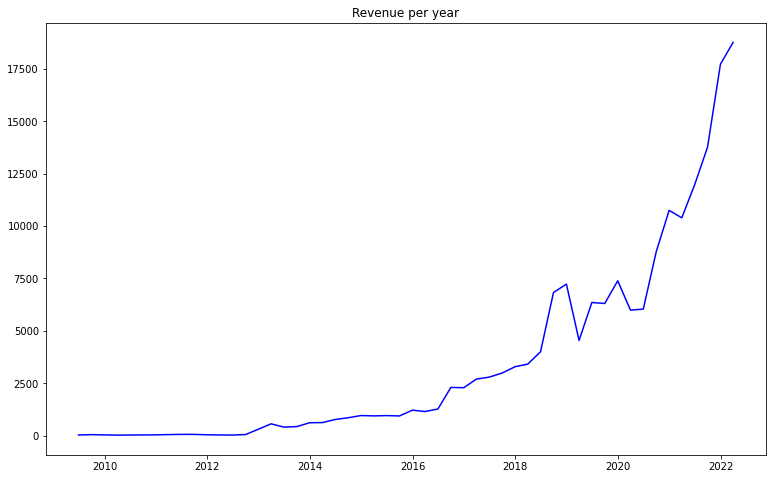

In [60]:
#Step 10: Finally create a plot to visualize the data
#What kind of visualizations show we do?
#revenue_df.head()
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Revenue per year')
ax1.plot(revenue_df['Date'],
        revenue_df['Revenue'],
        color='blue'
)
plt.show()



As you could see the revenue increase when increase de years but in 2020 had diferrente direction but we cuold supposes is for the COVID pandemic.